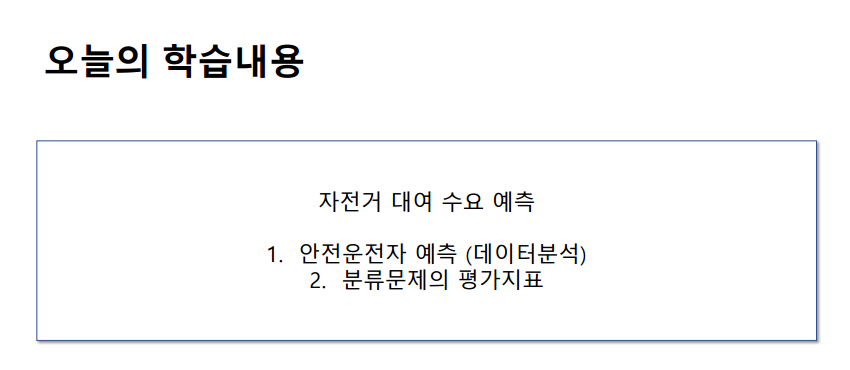

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

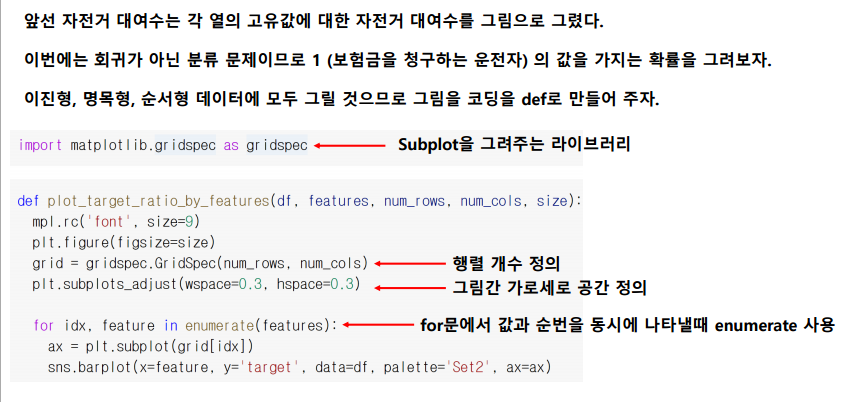

In [2]:
import matplotlib.gridspec as gridspec

In [3]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [4]:
def plot_target_ratio_by_features(df, features, num_rows, num_cols, size):
    mpl.rc('font', size = 9)
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    for idx, feature in enumerate(features):
        ax = plt. subplot(grid[idx])
        sns.barplot(x = feature, y = 'target', data = df, palette = 'Set2', ax= ax)

In [5]:
def resumetable(df): 
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values
    summary['고유값 개수'] = df.nunique().values
    for col in df.columns:
        if 'bin' in col or col =='target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
    return summary

In [6]:
summary = resumetable(train)

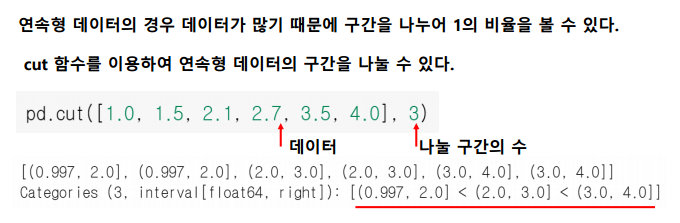

In [7]:
pd.cut([1.0, 1.5, 2.1, 2.7, 3.5, 4.0], 3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

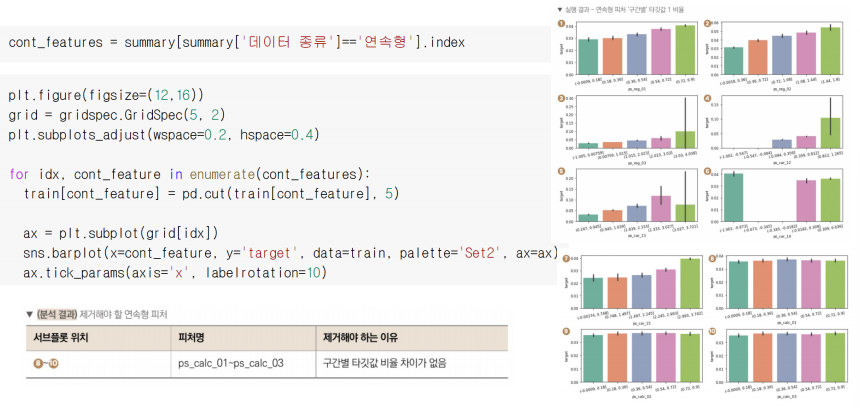

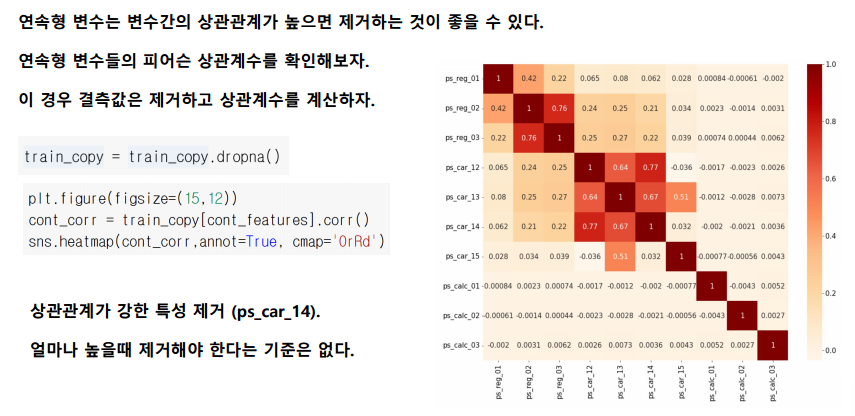

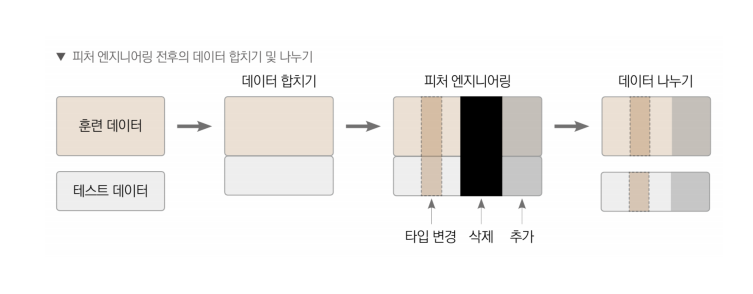

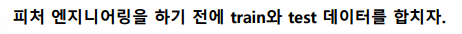

In [8]:
all_data = pd.concat([train, test], ignore_index = True)
all_data = all_data.drop('target', axis = 1)

In [9]:
all_features = all_data.columns
all_features

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

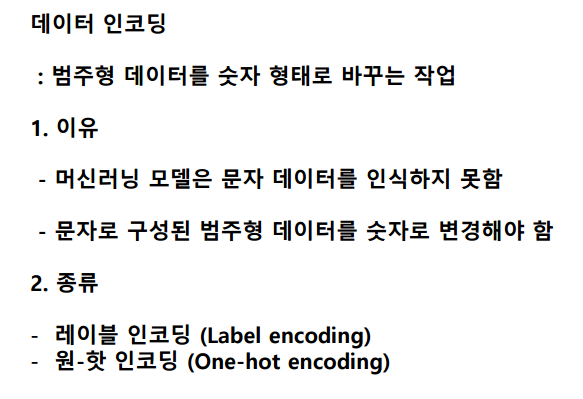

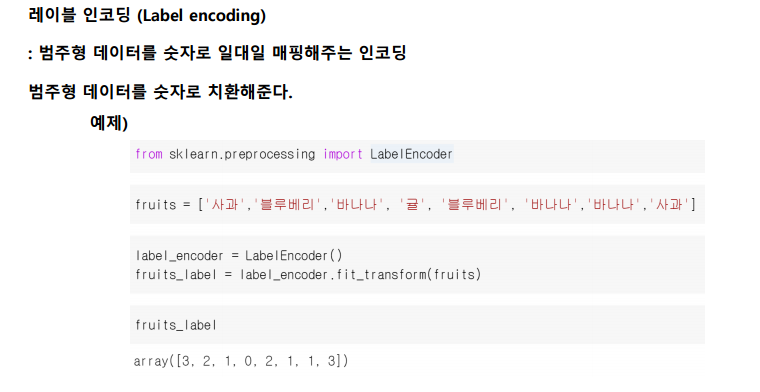

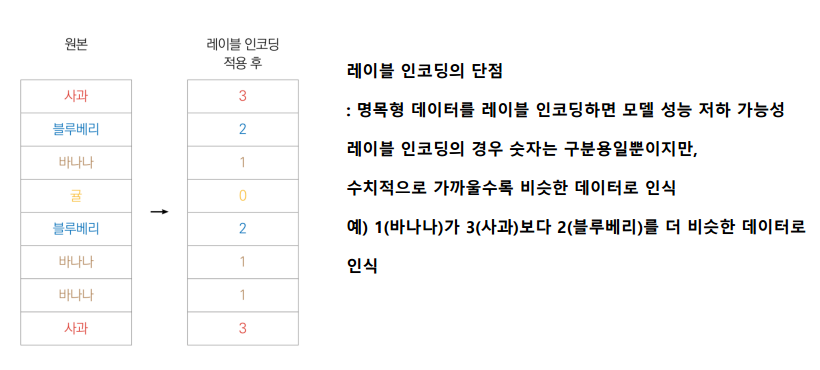

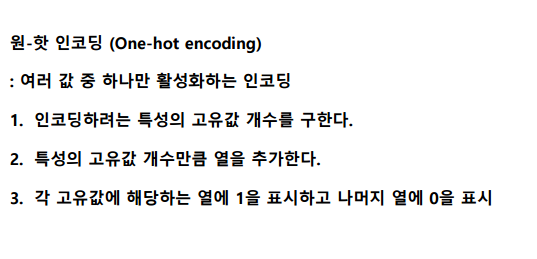

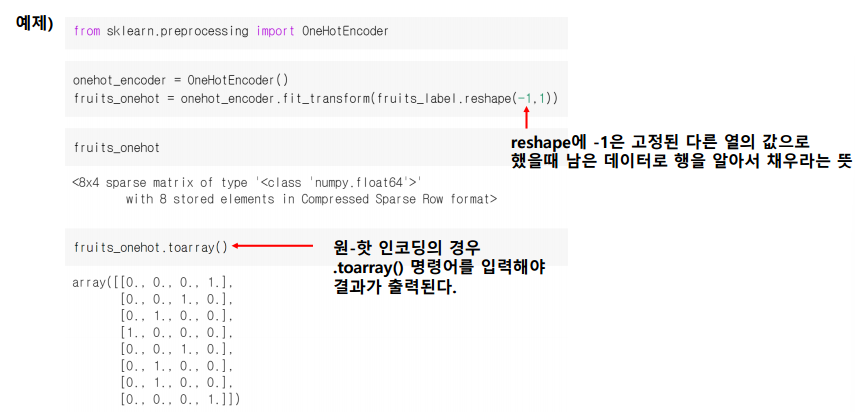

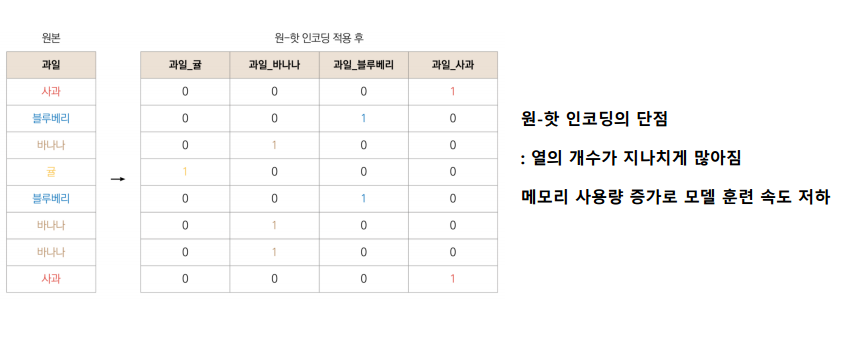

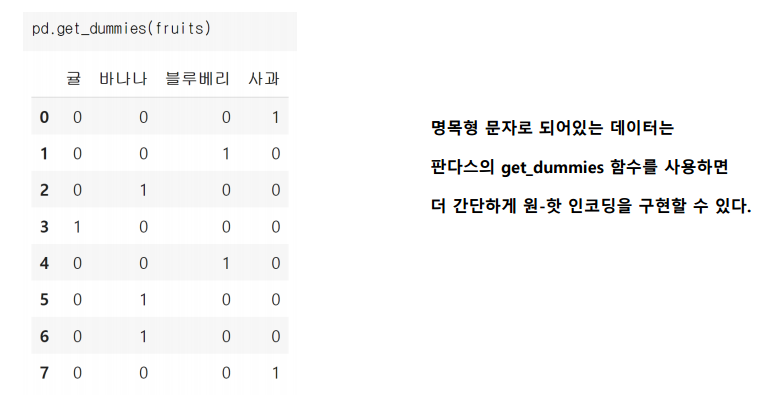

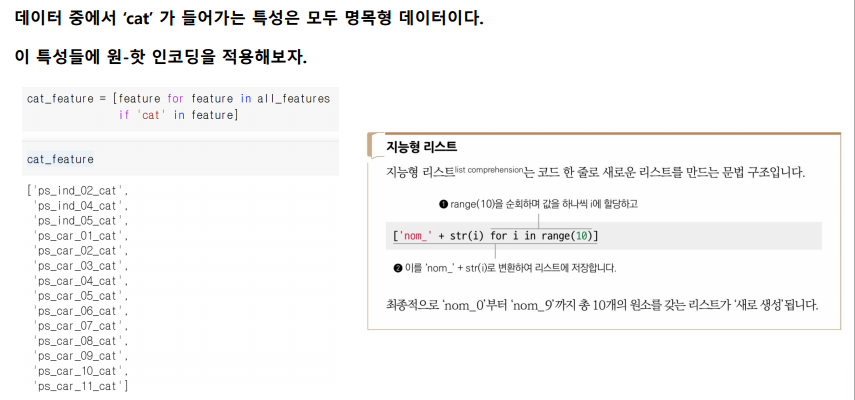

In [10]:
cat_feature = [feature for feature in all_features
              if 'cat' in feature]

In [11]:
cat_feature

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
onehot_encoder = OneHotEncoder()

In [15]:
encoded_cat = onehot_encoder.fit_transform(all_data[cat_feature])

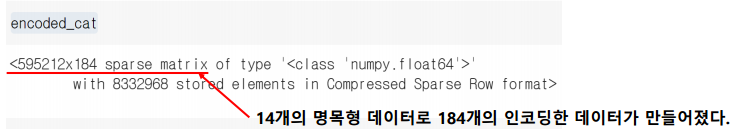

In [16]:
encoded_cat

<595212x184 sparse matrix of type '<class 'numpy.float64'>'
	with 8332968 stored elements in Compressed Sparse Row format>

In [17]:
encoded_cat.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

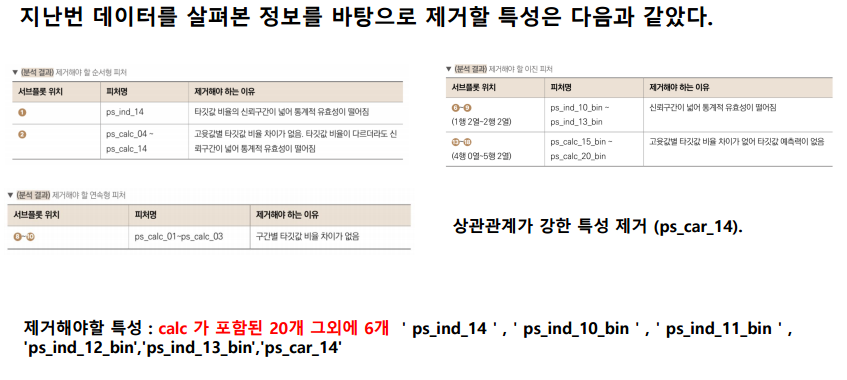

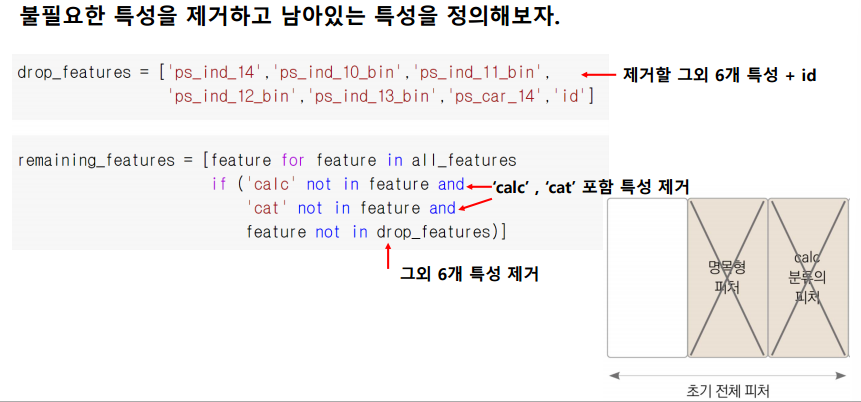

In [18]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin',
                 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14', 'id']

In [19]:
remaining_features = [feature for feature in all_features
                      if ('clac' not in feature and
                         'cat' not in feature and
                         feature not in drop_features)]

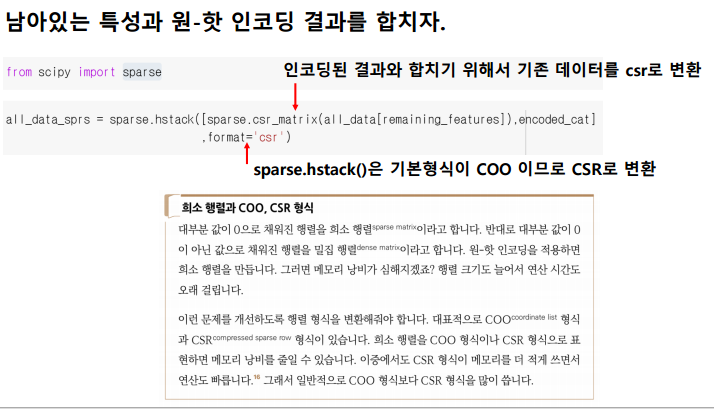

In [21]:
from scipy import sparse

In [22]:
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]),
                              encoded_cat], format = 'csr')

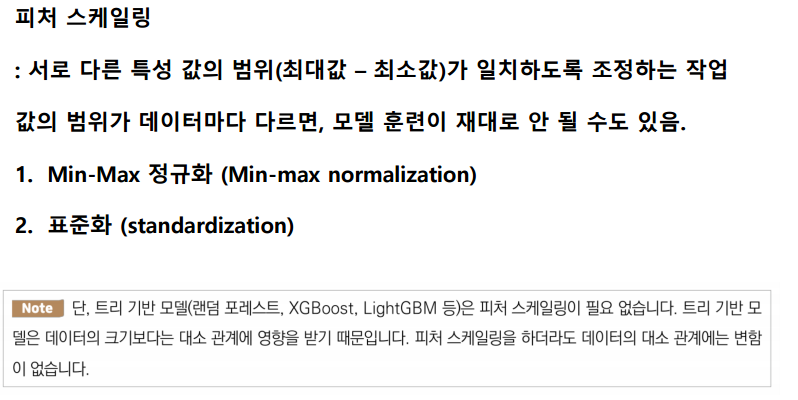

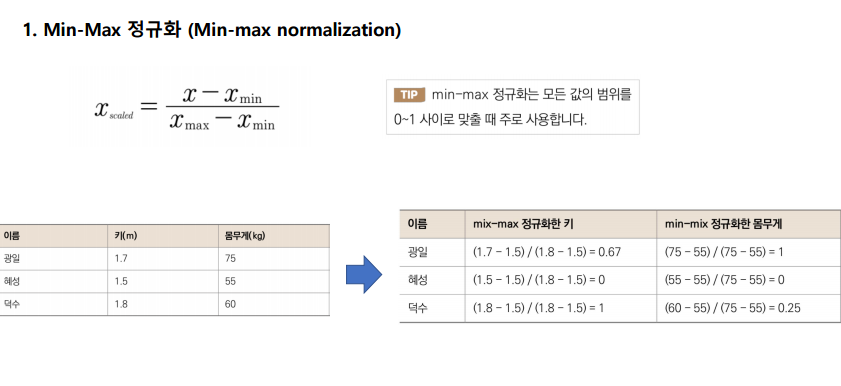

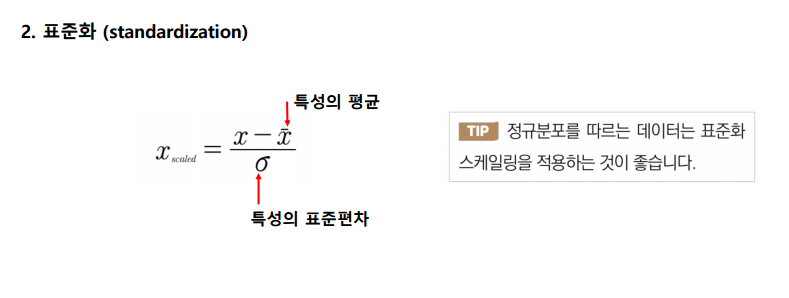

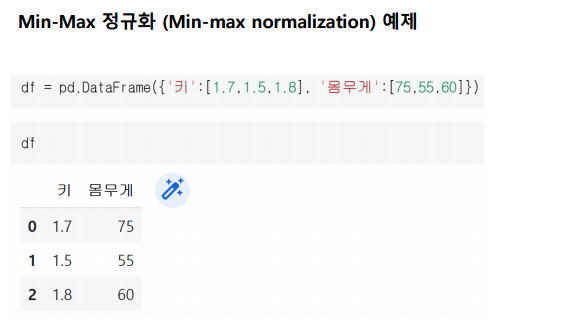

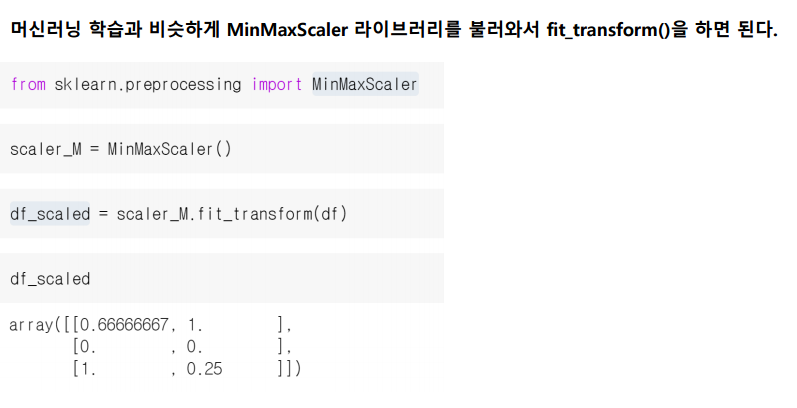

In [23]:
df = pd.DataFrame({'키' : [1.7, 1.5, 1.8], '몸무게' : [75, 55, 60]})

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler_M = MinMaxScaler()

In [26]:
df_scaled = scaler_M.fit_transform(df)

In [27]:
df_scaled

array([[0.66666667, 1.        ],
       [0.        , 0.        ],
       [1.        , 0.25      ]])

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler_S = StandardScaler()

In [30]:
df_scaled_S = scaler_S.fit_transform(df)

In [31]:
df_scaled_S

array([[ 0.26726124,  1.37281295],
       [-1.33630621, -0.98058068],
       [ 1.06904497, -0.39223227]])

In [32]:
num_train = len(train)

In [33]:
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

In [34]:
y_train = train['target'].values
t_test = test['target'].values